In [2]:
from spatialdata.datasets import blobs_annotating_element
from spatialdata.transformations import set_transformation, Affine

/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [3]:
import spatialdata_plot

In [4]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [5]:
theta = np.pi / 3
affine = Affine(
    [
        [np.cos(theta), -np.sin(theta), 20],
        [np.sin(theta), np.cos(theta), -5],
        [0, 0, 1]
    ],
    input_axes = ("x", "y"),
    output_axes=("x", "y")
)

In [10]:
sdata = blobs_annotating_element("blobs_polygons")
set_transformation(sdata["blobs_image"], affine, "global")

/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [11]:
sdata.table.obs['var'] = default_rng(0).random(5)

/var/folders/36/83j6x3ln225bvbpk1_vdzrm00000gn/T/ipykernel_52278/4214032312.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.obs['var'] = default_rng(0).random(5)


/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/mkeller/software/miniconda3/envs/spatialdata-plot/lib/python3.9/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `blobs_points` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/mkeller/research/dbmi/vitessce/spatialdata-plot/src/spatialdata_plot/pl/utils.py:778: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the d

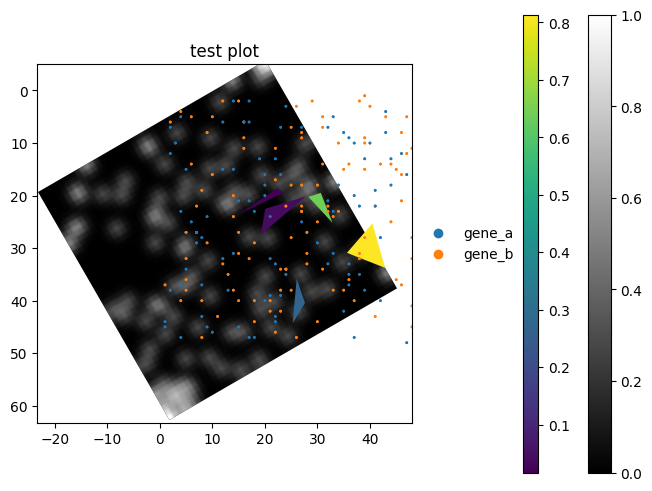

In [12]:
sdata_with_tree = (
    sdata
        .pl.render_images('blobs_image', channel=0, cmap='gray')
        .pl.render_shapes('blobs_polygons', color='var')
        .pl.render_points('blobs_points', color='genes')
)
sdata_with_tree.pl.show(title='test plot')

In [13]:
import json

In [14]:
sdata_with_tree.plotting_tree

OrderedDict([('1_render_images',
              ImageRenderParams(cmap_params=CmapParams(cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x2c65ae730>, norm=<matplotlib.colors.Normalize object at 0x107e858b0>, na_color='#d3d3d3ff', na_color_modified_by_user=False, cmap_is_default=False), element='blobs_image', channel=[0], palette=None, alpha=1.0, percentiles_for_norm=(None, None), scale=None, zorder=0)),
             ('2_render_shapes',
              ShapesRenderParams(cmap_params=CmapParams(cmap=<matplotlib.colors.ListedColormap object at 0x1726b89d0>, norm=<matplotlib.colors.Normalize object at 0x1726b80a0>, na_color='#d3d3d3ff', na_color_modified_by_user=False, cmap_is_default=True), outline_params=OutlineParams(outline=False, outline_color='#000000ff', linewidth=1.5), element='blobs_polygons', color=None, col_for_color='var', groups=None, contour_px=None, palette=None, outline_alpha=0.0, fill_alpha=1.0, scale=1.0, transfunc=None, method=None, zorder=1, table_name='table', 

In [22]:
def dump_plotting_tree(d):
    if isinstance(d, dict):
        expanded = dict()
        for k, v in d.items():
            if k.startswith("_"): # do we want this?
                continue
            try:
                json.dumps(v)
                expanded[k] = v
            except TypeError:
                try:
                    expanded[k] = dump_plotting_tree(v.__dict__)
                except AttributeError:
                    expanded[k] = repr(v)
        return expanded
    else:
        if isinstance(d, str):
            return d
        return repr(d)

In [23]:
print(json.dumps(dump_plotting_tree(sdata_with_tree.plotting_tree), indent=4))

{
    "1_render_images": {
        "cmap_params": {
            "cmap": {
                "monochrome": false,
                "name": "gray",
                "N": 256,
                "colorbar_extend": false
            },
            "norm": {
                "callbacks": {
                    "exception_handler": {},
                    "callbacks": {}
                }
            },
            "na_color": "#d3d3d3ff",
            "na_color_modified_by_user": false,
            "cmap_is_default": false
        },
        "element": "blobs_image",
        "channel": [
            0
        ],
        "palette": null,
        "alpha": 1.0,
        "percentiles_for_norm": [
            null,
            null
        ],
        "scale": null,
        "zorder": 0
    },
    "2_render_shapes": {
        "cmap_params": {
            "cmap": {
                "monochrome": false,
                "colors": [
                    [
                        0.267004,
                        0

In [48]:
def sdata_element_to_uuid(element_name):
    # Get the UUID for this element, reflecting the UUIDs in the "data" block of the config.
    return element_name + "_uuid_here"

def get_scale_name(pl_call_params):
    # Get the name for this scale, reflecting the "scales" block of the config.
    return "cmap"

def get_shapes_color_encoding(pl_call_params):
    # Need to consider whether to use "cmap", "color", "col_for_color", or "palette".
    # If "groups" is present, this should be used when generating the domain for the corresponding scale.
    # Note: "color" and "col_for_color" are expected to be mutually exclusive.
    
    
    # TODO: Note that this mark's "data" section refers to the shapes spatialdata element.
    # But "field" in the below may refer to a column in the table that annotates these shapes.
    if pl_call_params.get("col_for_color") is not None:
        # TODO: should `get_scale_name` be passed the scale type (like categorical or quantitative)?
        #adata = sdata.
        #col_series = sc.get.obs_df(adata, col_for_color)
        #if isinstance(col_series.dtype, pd.CategoricalDtype): # This is a categorical column, so should use a categorical color scale.
        #  pass
        return { "scale": get_scale_name(pl_call_params), "field": pl_call_params["col_for_color"] }
    elif pl_call_params.get("color") is not None:
        # If "color" is present in the plotting tree, the value is assumed to be a color-like string.
        return { "value": pl_call_params["color"] }
        
            
# TODO: the marks and scales seem to be pretty coupled. may be easier to generate both blocks simultaneously (e.g., modify both in each for loop iteration).
def plotting_tree_dict_to_marks(plotting_tree_dict):
    out = [] # caller will set { ..., "marks": out }
    for pl_call_id, pl_call_params in plotting_tree_dict.items():
        if pl_call_id.endswith("_render_images"):
            for channel_index in pl_call_params["channel"]:
                out.append({
                  "type": "raster_image",
                  "from": {"data": sdata_element_to_uuid(pl_call_params["element"])},
                  "zindex": pl_call_params["zorder"],
                  "encode": {
                      "opacity": { "value": pl_call_params.get("alpha") },
                      "color": {"scale": get_scale_name(pl_call_params), "field": channel_index }
                  }
                })
        if pl_call_id.endswith("_render_shapes"):
            out.append({
                "type": "shape",
                "from": {"data": sdata_element_to_uuid(pl_call_params["element"])},
                "zindex": pl_call_params["zorder"],
                "encode": {
                    "fillOpacity": { "value": pl_call_params.get("fill_alpha") },
                    "fillColor": get_shapes_color_encoding(pl_call_params),
                    "strokeWidth": { "value": pl_call_params.get("outline_width") }, # TODO: check whether this is the key used in the spatial plotting tree # TODO: what are the units?
                    "strokeColor": { "value": pl_call_params.get("outline_color") },
                    "strokeOpacity": { "value": pl_call_params.get("outline_alpha") },
                }
            })
        if pl_call_id.endswith("_render_points"):
            out.append({
                "type": "point",
                "from": {"data": sdata_element_to_uuid(pl_call_params["element"])},
                "zindex": pl_call_params["zorder"],
                "encode": {
                    "opacity": { "value": pl_call_params.get("alpha") },
                    "color": get_shapes_color_encoding(pl_call_params),
                    "size": { "value": pl_call_params.get("size") },
                }
            })
        if pl_call_id.endswith("_render_labels"):
            out.append({
                "type": "raster_labels",
                "from": {"data": sdata_element_to_uuid(pl_call_params["element"])},
                "zindex": pl_call_params["zorder"],
                "encode": {
                    "opacity": { "value": pl_call_params.get("alpha") },
                    "fillColor": get_shapes_color_encoding(pl_call_params),
                    "strokeColor": get_shapes_color_encoding(pl_call_params),
                    "strokeWidth": { "value": pl_call_params.get("contour_px") }, # TODO: check whether this is the key used in the spatial plotting tree
                    "strokeOpacity": { "value": pl_call_params.get("outline_alpha") }, # TODO: check whether this is the key used in the spatial plotting tree
                    "fillOpacity": { "value": pl_call_params.get("fill_alpha") }, # TODO: check whether this is the key used in the spatial plotting tree
                }
            })
    return out

In [49]:
plotting_tree_dict_to_marks(dump_plotting_tree(sdata_with_tree.plotting_tree))

[{'type': 'raster_image',
  'from': {'data': 'blobs_image_uuid_here'},
  'zindex': 0,
  'encode': {'opacity': {'value': 1.0},
   'color': {'scale': 'cmap', 'field': 0}}},
 {'type': 'shape',
  'from': {'data': 'blobs_polygons_uuid_here'},
  'zindex': 1,
  'encode': {'fillOpacity': {'value': 1.0},
   'fillColor': {'scale': 'cmap', 'field': 'var'},
   'strokeWidth': {'value': None},
   'strokeColor': {'value': None},
   'strokeOpacity': {'value': 0.0}}},
 {'type': 'point',
  'from': {'data': 'blobs_points_uuid_here'},
  'zindex': 2,
  'encode': {'opacity': {'value': 1.0},
   'color': {'scale': 'cmap', 'field': 'genes'},
   'size': {'value': 1.0}}}]